In [3]:
import pandas as pd
df = pd.read_csv('Independence100.csv')
print(df)

    Rank                           Restaurant       Sales  Average Check  \
0      1             Carmine's (Times Square)  39080335.0             40   
1      2                The Boathouse Orlando  35218364.0             43   
2      3                     Old Ebbitt Grill  29104017.0             33   
3      4  LAVO Italian Restaurant & Nightclub  26916180.0             90   
4      5             Bryant Park Grill & Cafe  26900000.0             62   
..   ...                                  ...         ...            ...   
95    96                 George's at the Cove  12194000.0             80   
96    97                            Le Coucou  12187523.0             95   
97    98                              Mi Vida  12032014.0             38   
98    99                               Upland  11965564.0             52   
99   100               Virgil's Real Barbecue  11391678.0             27   

          City   State  Meals Served  
0     New York    N.Y.      469803.0  
1     Orl

In [4]:
df1 = pd.DataFrame()

df1['x'] = df['Average Check']
df1['y'] = df['Sales']
df1

,x,y
0,40,39080335.0
1,43,35218364.0
2,33,29104017.0
3,90,26916180.0
4,62,26900000.0
...,...,...
95,80,12194000.0
96,95,12187523.0
97,38,12032014.0
98,52,11965564.0


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import cluster,datasets,metrics
from sklearn.cluster import KMeans

n_clusters = 3
Kmeans = cluster.KMeans(n_clusters).fit(df1)

Kmeans

C:\Users\yifun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

[[5.59285714e+01 1.36343541e+07]
 [7.90476190e+01 2.55201465e+07]
 [7.82702703e+01 1.82372292e+07]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


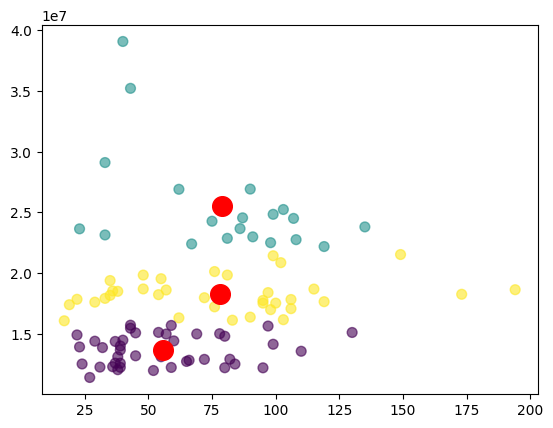

In [24]:
centroids = Kmeans.cluster_centers_ #取得各群中心點
print(centroids)
cluster_labels = Kmeans.labels_     #顯示樣本資造隸屬集群
print(cluster_labels)

#scatter()內接收第四個參數為資料點漸層係數，數值越小越透明
plt.figure()
plt.scatter(df1['x'],df1['y'],c = Kmeans.labels_,s=50,alpha=0.6)

plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200)
plt.show()

C:\Users\yifun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yifun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yifun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'SSE_value')

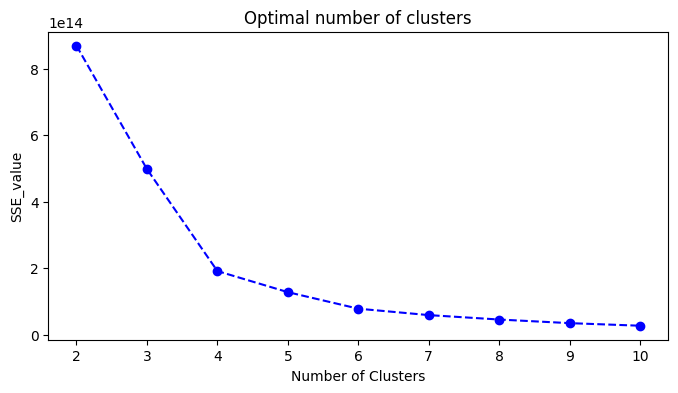

In [26]:
SSE = []

k = range(2,11)  #決定想檢測的群數，至少兩群

for x in k:
    kmean_optimized = KMeans(n_clusters = x)
    kmean_optimized.fit(df1)
    SSE.append(kmean_optimized.inertia_)    #計算inertia_，就是SSE

plt.figure(figsize=(8,4))
plt.plot(k,SSE,'bo--')
plt.title('Optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE_value')